1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [32]:
import numpy as np 
import pandas as pd
import scipy.stats
import scipy.linalg
import matplotlib.pyplot as plt

In [33]:
#function to generate sample
def sample_generator(mean, sigma, N):
    return scipy.stats.norm.rvs(mean, sigma, 1000)

N =  5000

sample1 = sample_generator(0, 1, N)
sample2 = sample1 + sample_generator(0, 3, N)
sample3 = 2 * sample1 + sample2

dataset = np.array([sample1,sample2,sample3])

CovarianceMatrix = np.cov(dataset)
cols, rows = np.shape(dataset)
print("\nCovariance matrix:\n", CovarianceMatrix)

#eigendecomposition of the covariance matrix

eigenVal, eigenVec = scipy.linalg.eig(CovarianceMatrix)
eigenVal = np.real_if_close(eigenVal)

print('\nUsing Eigendecomposition')
print('\nEigenvalues:\n',  eigenVal)
print('\nEigenvectors:\n',  eigenVec)

#SVD

eigenVecSVD, spectrum, Vt = scipy.linalg.svd(dataset)

eigenValSVD = np.real_if_close(spectrum)**2/(N-1)

print('\n\nUsing SVD\n')
print('\nEigenvalues:\n',  eigenValSVD)
print('\nEigenvectors:\n',  eigenVecSVD)




Covariance matrix:
 [[ 1.07480813  0.92193364  3.0715499 ]
 [ 0.92193364  9.43257515 11.27644244]
 [ 3.0715499  11.27644244 17.41954225]]

Using Eigendecomposition

Eigenvalues:
 [2.57638361e+01 8.90861985e-16 2.16308940e+00]

Eigenvectors:
 [[-0.1224342  -0.81649658  0.56421911]
 [-0.56859026 -0.40824829 -0.71416976]
 [-0.81345866  0.40824829  0.41426845]]


Using SVD


Eigenvalues:
 [5.15440091e+00 4.32583456e-01 2.08118196e-31]

Eigenvectors:
 [[-0.12259436  0.56418433 -0.81649658]
 [-0.5683875  -0.71433114 -0.40824829]
 [-0.81357622  0.41403751  0.40824829]]


In [34]:
#let's reconstruct the covariance matrices from the two methods
C2 = np.dot(eigenVec, np.dot(np.diag( np.real_if_close(eigenVal) ), eigenVec.T))

# check for SVD of dataset
C3 = np.dot(eigenVecSVD, np.dot(np.diag( np.real_if_close(eigenValSVD) ), eigenVecSVD.T))


print("Covariance matrix obtained after eigendecomposition method:\n", C2)
print("\nCovariance matrix obtained after SVD method:\n", C3)

print("\nEven if we get the same results, we can notice a difference probably due to different numerical approximations in the two methods. \n")


Covariance matrix obtained after eigendecomposition method:
 [[ 1.07480813  0.92193364  3.0715499 ]
 [ 0.92193364  9.43257515 11.27644244]
 [ 3.0715499  11.27644244 17.41954225]]

Covariance matrix obtained after SVD method:
 [[0.21516046 0.18482696 0.61514788]
 [0.18482696 1.88593711 2.25559103]
 [0.61514788 2.25559103 3.48588679]]

Even if we get the same results, we can notice a difference probably due to different numerical approximations in the two methods. 



In [35]:
#Reducing the dimensionality of the system so that at least 99% of the total variability is retained

trace = (np.diag(eigenVal)).trace()
print('The trace is:',trace)

#summing eigenvalues till reaching the 99% of the trace
threshold = 0.99*trace
sumEigenVal = 0  


for i, j in enumerate(np.flip(np.sort(eigenVal))):
    sumEigenVal += j
    print(i)
    if sumEigenVal >= threshold:
        i += 1
        break

print(f"\nThe number of features that retain th 99% of the total variability is {i}")
print()
print("The contributions of the three features to the eigenvalues of the cov_matrix are the following:")
print(f"1: {np.abs(eigenVal[0]) / trace * 100:.2f}%")
print(f"2: {np.abs(eigenVal[1]) / trace * 100:.16f}%")
print(f"3: {np.abs(eigenVal[2]) / trace * 100:.2f}%")
print()

# Redefine the data according to the new basis from the PCA
reducedDataset = np.delete(newBasisDataset,  np.argmin(eigenVal), 0)

The trace is: 27.926925528145293
[(0, 25.763836125305108), (1, 2.163089402840184), (2, 8.908619853449607e-16)]
0
1

The number of features that retain th 99% of the total variability is 2

The contributions of the three features to the eigenvalues of the cov_matrix are the following:
1: 92.25%
2: 0.0000000000000032%
3: 7.75%



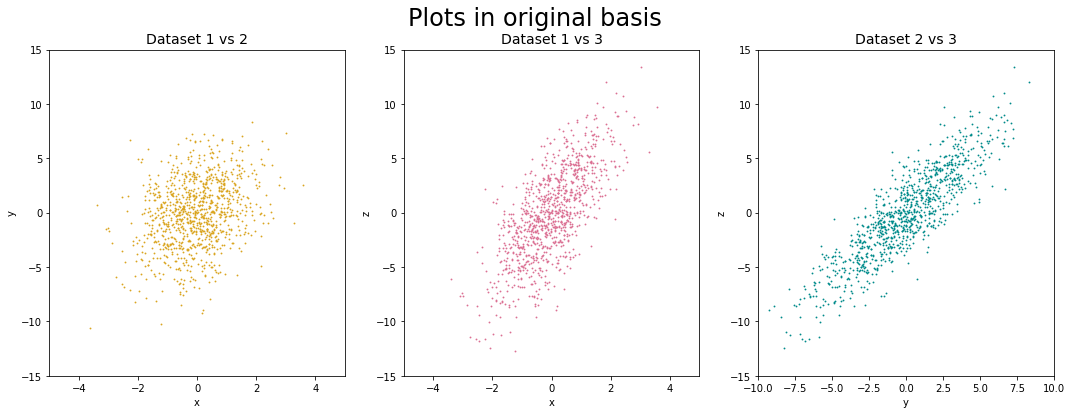

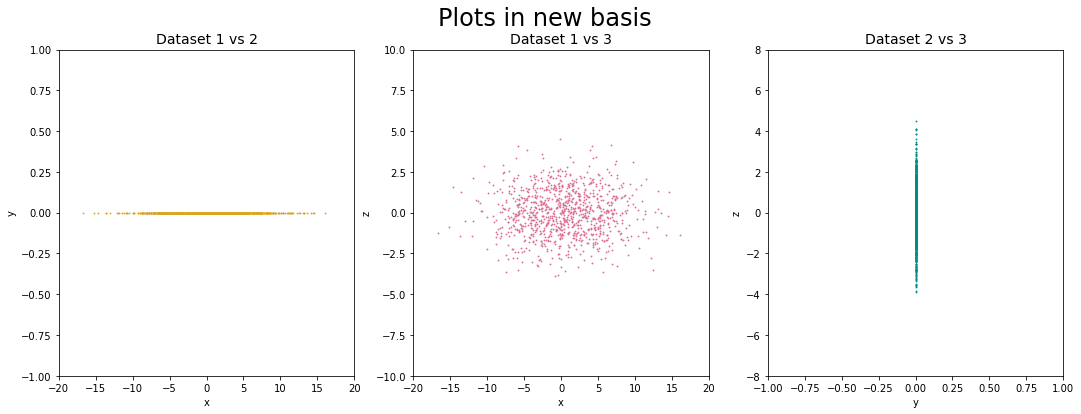

In [55]:
  

#plot original basis
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(18,6))
#fig = plt.figure(figsize = (12,8))
fig.suptitle('Plots in original basis', fontsize = 24)

#dataset1 and 2
ax1.scatter(x = sample1, y = sample2, s = 0.7, color = 'goldenrod')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Dataset 1 vs 2', fontsize = 14)
ax1.set_xlim(-5,5)
ax1.set_ylim(-15,15)

#dataset1 and 3
ax2.scatter(x = sample1, y = sample3, s = 0.7, color = 'palevioletred')
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Dataset 1 vs 3', fontsize = 14)
ax2.set_xlim(-5,5)
ax2.set_ylim(-15,15)

#dataset 2 and 3
ax3.scatter(x = sample2, y = sample3, s = 0.7, color = 'darkcyan')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('Dataset 2 vs 3', fontsize = 14)
ax3.set_xlim(-10,10)
ax3.set_ylim(-15,15)

plt.show()


#plot new basis
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(18,6))
#fig = plt.figure(figsize = (12,8))
fig.suptitle('Plots in new basis', fontsize = 24)

#dataset1 and 2
ax1.scatter(x = newBasisDataset[0], y = newBasisDataset[1], s = 0.7, color = 'goldenrod')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Dataset 1 vs 2', fontsize = 14)
ax1.set_xlim(-20,20)
ax1.set_ylim(-1,1)

#dataset1 and 3
ax2.scatter(x = newBasisDataset[0], y = newBasisDataset[2], s = 0.7, color = 'palevioletred')
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Dataset 1 vs 3', fontsize = 14)
ax2.set_xlim(-20,20)
ax2.set_ylim(-10,10)

#dataset 2 and 3
ax3.scatter(x = newBasisDataset[1], y = newBasisDataset[2], s = 0.7, color = 'darkcyan')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('Dataset 2 vs 3', fontsize = 14)
ax3.set_xlim(-1,1)
ax3.set_ylim(-8,8)

plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [37]:
#adding uncorrelated random noise
sigmas, means = np.random.uniform(1/50, 5/50, 10), np.random.uniform(-5, 5, 10)

noise = np.array([sample_generator(m,s,N) for m, s in zip(means, sigmas)])
newDataset = np.vstack((dataset, noise))

# covariance matrix
CovarianceMatrix = np.cov(newDataset)

eigenVal, eigenVec = scipy.linalg.eig(CovarianceMatrix)
eigenVal = np.real_if_close(eigenVal)

#PCA
trace = (np.diag(eigenVal)).trace()


threshold = 0.99*trace 

sumEigenVal = 0  
for i, li in enumerate(np.flip(np.sort(eigenVal))):
    sumEigenVal += li
    if sumEigenVal >= threshold:
        i += 1
        break

print(f"The number of features that retain th 99% of the total variability is {i}")
print("\nThe contributions of the three features to the eigenvalues of the cov_matrix are the following:")
print(f"1: {np.abs(eigenVal[0]) / trace * 100:.2f}%")
print(f"2: {np.abs(eigenVal[1]) / trace * 100:.16f}%")
print(f"3: {np.abs(eigenVal[2]) / trace * 100:.2f}%")
print('\n\nSame as before! So noise is not adding any information.')

The number of features that retain th 99% of the total variability is 2

The contributions of the three features to the eigenvalues of the cov_matrix are the following:
1: 92.08%
2: 7.7306091002612503%
3: 0.00%


Same as before! So noise is not adding any information.


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [38]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2021-12-20 17:56:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 1477391 (1,4M) [application/x-httpd-php]
Salvataggio in: «data/magic04.data.3»

magic04.data.3      100%[===================>]   1,41M   669KB/s    in 2,2s    

2021-12-20 17:56:17 (669 KB/s) - «data/magic04.data.3» salvato [1477391/1477391]

--2021-12-20 17:56:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 5400 (5,3K) [application/x-httpd-php]
Salvataggio in: «data/magic04.names.2»

magic04.name

In [39]:
data =  pd.read_csv("./data/magic04.data", sep=",")

with open("./data/magic04.names") as f:
    print(f.read())

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi